**Mall Customer Segmentation**

Load Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Load Dataset

In [2]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

In [3]:
# Preview
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
print(df.shape)

(200, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Inspect Income and Spending Score columns

In [7]:
# Select the required columns
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
# Check basic statistics
features.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


Drop CustomerID column

In [9]:
# Drop CustomerID column
df = df.drop(columns=['CustomerID'])

# Verify
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
# Double-check remaining columns
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

Apply StandardScaler to features for balanced distance calculation

In [11]:
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional but readable)
X_scaled = pd.DataFrame(
    X_scaled,
    columns=X.columns
)

In [12]:
# View scaled data
X_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


Run KMeans for multiple values of K and store inertia values

In [13]:
inertia = []

# Try K from 1 to 10
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [14]:
# View inertia values
for k, val in zip(K_range, inertia):
    print(f"K = {k}, Inertia = {val}")

K = 1, Inertia = 399.99999999999994
K = 2, Inertia = 273.6688866264201
K = 3, Inertia = 157.70400815035947
K = 4, Inertia = 109.22822707921347
K = 5, Inertia = 65.56840815571681
K = 6, Inertia = 60.13287487193422
K = 7, Inertia = 49.66824483736798
K = 8, Inertia = 37.319122878338824
K = 9, Inertia = 32.49508119910091
K = 10, Inertia = 30.05932269404221


Plot elbow curve to decide optimal number of clusters

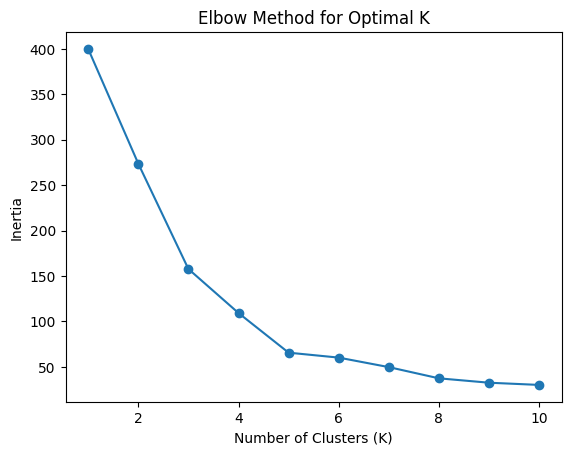

In [15]:
# Plot Elbow Curve (K vs Inertia)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

''We’ll train the final KMeans model using the selected optimal K (commonly K = 5 for Mall Customers).''

Train KMeans with selected K value

In [16]:
# Train final KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit on scaled data
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

In [17]:
# View clustered data
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


In [18]:
# View cluster centers
kmeans.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

Add cluster labels back into dataset

In [19]:
# Add cluster labels
df['Cluster'] = kmeans.labels_

# Verify
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


In [20]:
# Check cluster distribution
df['Cluster'].value_counts()

Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

Visualize clusters using scatter plot

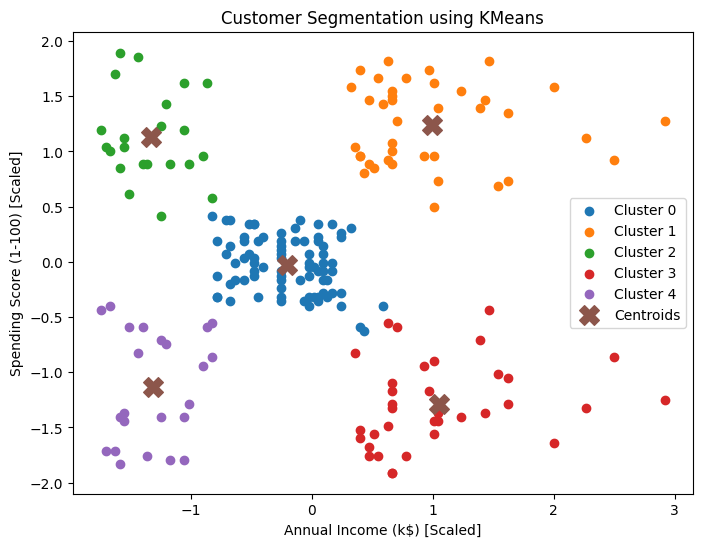

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for cluster in sorted(df['Cluster'].unique()):
    plt.scatter(
        X_scaled[df['Cluster'] == cluster]['Annual Income (k$)'],
        X_scaled[df['Cluster'] == cluster]['Spending Score (1-100)'],
        label=f'Cluster {cluster}'
    )

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='X',
    s=200,
    label='Centroids'
)

plt.xlabel('Annual Income (k$) [Scaled]')
plt.ylabel('Spending Score (1-100) [Scaled]')
plt.title('Customer Segmentation using KMeans')
plt.legend()
plt.show()

Interpret each cluster and label them as customer types

In [22]:
"""look at cluster centers (scaled values)"""
# Cluster centers in scaled space
centroids = kmeans.cluster_centers_

# Convert centroids back to original scale
import numpy as np
centroids_original = scaler.inverse_transform(centroids)
centroids_df = pd.DataFrame(centroids_original, columns=X.columns)
centroids_df

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


| Cluster | Avg Annual Income (k$) | Avg Spending Score | Likely Segment                       |
| ------- | ---------------------- | ------------------ | -------------------------------------|
| 0       | 55.3                   | 49.5               | **Middle Income – Average Spenders** |
| 1       | 86.5                   | 82.1               | **High Income – High Spenders**      |
| 2       | 25.7                   | 79.4               | **Low Income – High Spenders**       |
| 3       | 88.2                   | 17.1               | **High Income – Low Spenders**       |
| 4       | 26.3                   | 20.9               | **Low Income – Low Spenders**        |

- Medium Income/Spending → Standard segment, mass marketing, typical customers, moderate spending.
- High Income, High Spending → Premium Customers, target for exclusive offers, target for luxury campaigns.
- Low Income, High Spending → Impulsive Buyers, target for promotions, value shoppers.
- High Income, Low Spending → Cautious Investors, might respond to loyalty programs, occasional buyers.
- Low Income, Low Spending → Budget Shoppers, target discounts, potential for promotions.

Add labels back to dataset

In [23]:
# Define mapping
cluster_labels = {
    0: 'Low-Income, Low-Spenders',
    1: 'Low-Income, High-Spenders',
    2: 'High-Income, Low-Spenders',
    3: 'Average-Income, Average-Spenders',
    4: 'High-Income, High-Spenders'
}

# Map cluster numbers to labels
df['Customer_Type'] = df['Cluster'].map(cluster_labels)

In [24]:
# View final dataset
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Customer_Type
0,Male,19,15,39,4,"High-Income, High-Spenders"
1,Male,21,15,81,2,"High-Income, Low-Spenders"
2,Female,20,16,6,4,"High-Income, High-Spenders"
3,Female,23,16,77,2,"High-Income, Low-Spenders"
4,Female,31,17,40,4,"High-Income, High-Spenders"
